In [296]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas import ExcelWriter


%matplotlib inline

In [184]:
dataFile = pd.read_excel("C:/Users/Kshitij/Downloads/Data_Train.xlsx")
#data.describe()

In [185]:
type(dataFile)

pandas.core.frame.DataFrame

In [186]:
dataFile.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [187]:
data = pd.DataFrame(dataFile)


C:\Users\Kshitij\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


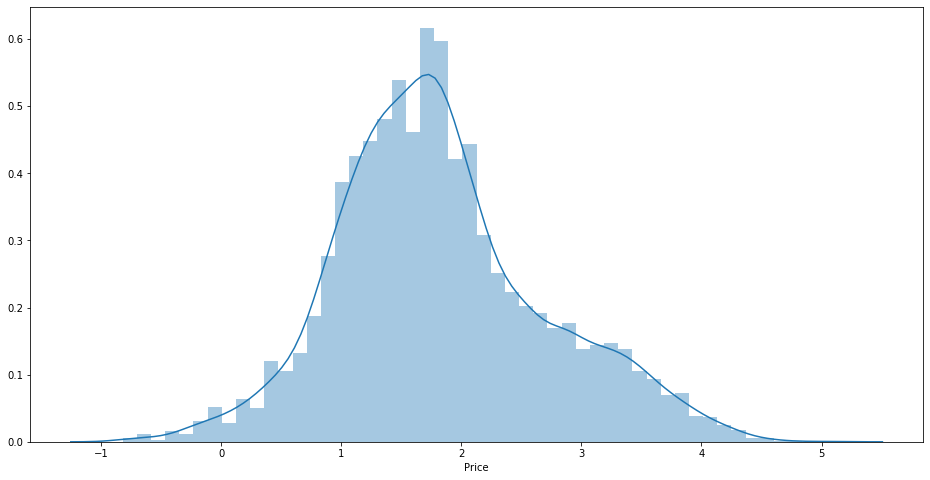

In [188]:
plt.figure(figsize=(16,8))
sns.distplot(np.log(data['Price']))
plt.show()

In [189]:
data.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
Price,0.305327,-0.011493,0.052225,1.000000


In [190]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

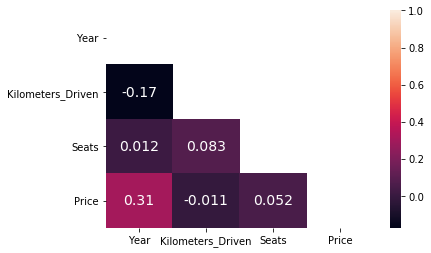

In [191]:
sns.heatmap(data.corr(), mask =mask, annot = True, annot_kws = {"size": 14})
plt.show()

In [192]:
data.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [193]:
data1 = data
data1.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50


In [194]:
# z = pd.get_dummies(data1.Fuel_Type)
# x = pd.get_dummies(data1.Transmission, drop_first = True)
# y = pd.get_dummies(data.Owner_Type)
# data1 = pd.concat([data1,z,x,y], axis = 1)

In [195]:
data1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [196]:
data1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [197]:
# data1.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'], axis = 1, inplace = True)

# data1.Mileage = data1.Mileage.str.replace("km/kg","")

# data1.Power = data1.Power.str.replace("bhp","")

# data1.Engine = data1.Engine.str.replace("CC","")

# data1.Mileage = data1.Mileage.str.replace("kmpl","")

# data1.Mileage = pd.to_numeric(data1.Mileage,errors="coerce")

# data1.Power = pd.to_numeric(data1.Power,errors="coerce")

# data1.Engine = pd.to_numeric(data1.Engine,errors = "coerce")

# data1.Mileage = data1.Mileage.fillna(0)

# data1.Power = data1.Power.fillna(0)

# data1.Engine = data1.Engine.fillna(0)

# data1.Seats = data1.Seats.fillna(0)

In [198]:
def alter_data(data1):
        
        z = pd.get_dummies(data1.Fuel_Type)
        x = pd.get_dummies(data1.Transmission, drop_first = True)
        y = pd.get_dummies(data.Owner_Type)
        data1 = pd.concat([data1,z,x,y], axis = 1)
        
        data1.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'], axis = 1, inplace = True)

        data1.Mileage = data1.Mileage.str.replace("km/kg","")

        data1.Power = data1.Power.str.replace("bhp","")

        data1.Engine = data1.Engine.str.replace("CC","")

        data1.Mileage = data1.Mileage.str.replace("kmpl","")

        data1.Mileage = pd.to_numeric(data1.Mileage,errors="coerce")

        data1.Power = pd.to_numeric(data1.Power,errors="coerce")

        data1.Engine = pd.to_numeric(data1.Engine,errors = "coerce")

        data1.Mileage = data1.Mileage.fillna(0)

        data1.Power = data1.Power.fillna(0)

        data1.Engine = data1.Engine.fillna(0)

        data1.Seats = data1.Seats.fillna(0)
        
        return data1

In [199]:
data1 = alter_data(data1)

In [200]:
data1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,CNG,Diesel,Electric,LPG,Petrol,Manual,First,Fourth & Above,Second,Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,1,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0,0,0,0,1,0


In [201]:
data1.isnull().any()

Year                 False
Kilometers_Driven    False
Mileage              False
Engine               False
Power                False
Seats                False
Price                False
CNG                  False
Diesel               False
Electric             False
LPG                  False
Petrol               False
Manual               False
First                False
Fourth & Above       False
Second               False
Third                False
dtype: bool

In [202]:
feature = data1.drop(['Price'],axis=1)
target = np.log(data1.Price)

In [203]:
feature.head(3)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,CNG,Diesel,Electric,LPG,Petrol,Manual,First,Fourth & Above,Second,Third
0,2010,72000,26.60,998.0,58.16,5.0,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,0,0,1,1,1,0,0,0


In [204]:
target.head()

0    0.559616
1    2.525729
2    1.504077
3    1.791759
4    2.875822
Name: Price, dtype: float64

In [205]:
feature.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,CNG,Diesel,Electric,LPG,Petrol,Manual,First,Fourth & Above,Second,Third
0,2010,72000,26.60,998.0,58.16,5.0,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,0,0,1,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,1,0,0,0,0,0,0,1,0


## Finding Significant attributes using p-values

In [206]:
add_incl_const = sm.add_constant(np.array(feature))
model = sm.OLS(target, add_incl_const)
results = model.fit()
results.params

const   -1.755824e+02
x1       1.274845e-01
x2      -7.751626e-08
x3      -3.058436e-02
x4       2.135913e-04
x5       5.686670e-03
x6      -7.142362e-02
x7      -3.518554e+01
x8      -3.497357e+01
x9      -3.482389e+01
x10     -3.524021e+01
x11     -3.535920e+01
x12     -3.490257e-01
x13     -4.389168e+01
x14     -4.372758e+01
x15     -4.394892e+01
x16     -4.401423e+01
dtype: float64

In [207]:
pd.DataFrame({"coef": results.params,"p-values": round(results.pvalues,3)})

,coef,p-values
const,-1.755824e+02,0.000
x1,1.274845e-01,0.000
x2,-7.751626e-08,0.104
x3,-3.058436e-02,0.000
x4,2.135913e-04,0.000
x5,5.686670e-03,0.000
x6,-7.142362e-02,0.000
x7,-3.518554e+01,0.000
x8,-3.497357e+01,0.000
x9,-3.482389e+01,0.000


In [208]:
#Kilometers_Driven is insignificant attribute because its p-value is greater than 0.05

In [237]:
feature.head()

,Year,Mileage,Engine,Power,Seats,CNG,Diesel,Electric,LPG,Petrol,Manual,First,Fourth & Above,Second,Third
0,2010,26.60,998.0,58.16,5.0,1,0,0,0,0,1,1,0,0,0
1,2015,19.67,1582.0,126.20,5.0,0,1,0,0,0,1,1,0,0,0
2,2011,18.20,1199.0,88.70,5.0,0,0,0,0,1,1,1,0,0,0
3,2012,20.77,1248.0,88.76,7.0,0,1,0,0,0,1,1,0,0,0
4,2013,15.20,1968.0,140.80,5.0,0,1,0,0,0,0,0,0,1,0


In [209]:
feature = feature.drop(['Kilometers_Driven'], axis=1)

In [210]:
len(feature.columns)

15

## Function for Prediction

In [211]:
feature.mean()

Year              2013.358199
Mileage             18.128935
Engine            1611.579498
Power              110.562372
Seats                5.241901
CNG                  0.009304
Diesel               0.532480
Electric             0.000332
LPG                  0.001661
Petrol               0.456222
Manual               0.714238
First                0.818907
Fourth & Above       0.001495
Second               0.160824
Third                0.018774
dtype: float64

In [212]:
car_prices=np.ndarray(shape=(1,15))
car_prices = feature.mean().values.reshape(1,15)

In [213]:
car_prices

array([[2.01335820e+03, 1.81289350e+01, 1.61157950e+03, 1.10562372e+02,
        5.24190065e+00, 9.30387107e-03, 5.32480478e-01, 3.32281110e-04,
        1.66140555e-03, 4.56221964e-01, 7.14238246e-01, 8.18906795e-01,
        1.49526499e-03, 1.60824057e-01, 1.87738827e-02]])

In [214]:
type(feature)

pandas.core.frame.DataFrame

In [215]:
regr = LinearRegression().fit(feature,target)
fitted_vals = regr.predict(feature)
fitted_vals

array([0.60287858, 2.17693924, 1.03144711, ..., 1.808535  , 1.10005598,
       0.96123285])

In [216]:
MSE = mean_squared_error(target,fitted_vals)
RMSE = np.sqrt(MSE)

In [217]:
type(feature[1:2])

pandas.core.frame.DataFrame

In [218]:
def get_estimate(data):
    log_estimate_price = regr.predict(data)[0]

    return np.e**log_estimate_price

In [288]:
def get_price(data):
    #print("Price of the selected car in lakhs is",round(get_estimate(data),3),end=" Thank you :)")
    return round(get_estimate(data),3)

# Predicting data in Test Document

In [220]:
dataTest = pd.read_excel("C:/Users/Kshitij/Downloads/Data_Test.xlsx")
data_test = pd.DataFrame(dataTest)

In [221]:
dataTest.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [222]:
dataTest = alter_data(dataTest)

In [231]:
dataTest = dataTest.drop(['Kilometers_Driven'],axis = 1)

In [232]:
dataTest.head()

,Year,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Manual,First,Fourth & Above,Second,Third
0,2014.0,32.26,998.0,58.20,4.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0
1,2013.0,24.70,796.0,47.30,5.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0
2,2017.0,13.68,2393.0,147.80,7.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0
3,2012.0,23.59,1364.0,0.00,5.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0
4,2014.0,18.50,1197.0,82.85,5.0,0.0,0.0,0.0,1.0,1.0,0,0,1,0


In [273]:
# get_price(dataTest[1:2])

In [229]:
data1.head(3)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,CNG,Diesel,Electric,LPG,Petrol,Manual,First,Fourth & Above,Second,Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,1,1,1,0,0,0


In [234]:
len(dataTest.columns)

14

In [235]:
dataTest.head()

,Year,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Manual,First,Fourth & Above,Second,Third
0,2014.0,32.26,998.0,58.20,4.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0
1,2013.0,24.70,796.0,47.30,5.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0
2,2017.0,13.68,2393.0,147.80,7.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0
3,2012.0,23.59,1364.0,0.00,5.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0
4,2014.0,18.50,1197.0,82.85,5.0,0.0,0.0,0.0,1.0,1.0,0,0,1,0


In [241]:
feature.columns

Index(['Year', 'Mileage', 'Engine', 'Power', 'Seats', 'CNG', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', 'First', 'Fourth & Above',
       'Second', 'Third'],
      dtype='object')

In [257]:
len(feature.columns) == (len(dataTest.columns))

False

In [252]:
dataTest2 = pd.DataFrame(dataTest,columns=['Year', 'Mileage', 'Engine', 'Power', 'Seats', 'CNG', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', 'First', 'Fourth & Above',
       'Second', 'Third'])

In [260]:
dataTest2.isnull().any()

Year              False
Mileage           False
Engine            False
Power             False
Seats             False
CNG               False
Diesel            False
Electric          False
LPG               False
Petrol            False
Manual            False
First             False
Fourth & Above    False
Second            False
Third             False
dtype: bool

In [259]:
dataTest2.CNG = dataTest2.CNG.fillna(0)
dataTest2.Diesel = dataTest2.Diesel.fillna(0)
dataTest2.LPG = dataTest2.LPG.fillna(0)
dataTest2.Electric = dataTest2.Electric.fillna(0)
dataTest2.Petrol = dataTest2.Petrol.fillna(0)
dataTest2.Manual = dataTest2.Manual.fillna(0)
dataTest2.Year = dataTest2.Year.fillna(0)

In [261]:
dataTest2

,Year,Mileage,Engine,Power,Seats,CNG,Diesel,Electric,LPG,Petrol,Manual,First,Fourth & Above,Second,Third
0,2014.0,32.26,998.0,58.20,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
1,2013.0,24.70,796.0,47.30,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0
2,2017.0,13.68,2393.0,147.80,7.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0
3,2012.0,23.59,1364.0,0.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0
4,2014.0,18.50,1197.0,82.85,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,1,0
5,2016.0,16.00,2179.0,140.00,7.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0
6,2015.0,12.55,2982.0,168.70,7.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0
7,2013.0,21.10,814.0,55.20,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0
8,2011.0,17.00,1497.0,118.00,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0
9,2015.0,15.10,2179.0,140.00,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0


In [264]:
a = get_price(dataTest2[1:2])

Price of the selected car in lakhs is 2.153 Thank you :)

# Appending price column into the Test DataSet

In [268]:
price_Test_List = [get_price(dataTest2)]

Price of the selected car in lakhs is 2.754 Thank you :)

In [ ]:
# We comment out the print statement in the get_price Function

In [269]:
price_Test_List

[None]

In [280]:
dataTest2.iloc[1]

Year              2013.0
Mileage             24.7
Engine             796.0
Power               47.3
Seats                5.0
CNG                  0.0
Diesel               0.0
Electric             0.0
LPG                  0.0
Petrol               1.0
Manual               1.0
First                1.0
Fourth & Above       0.0
Second               0.0
Third                0.0
Name: 1, dtype: float64

In [290]:
List=[]

In [291]:
for i in range(6019):
    #get_price(np.ndarray(i).reshape(1,15))
    List.append(get_price((dataTest2.iloc[i]).values.reshape(1,15)))

In [292]:
List

[2.754,
 2.153,
 15.928,
 2.481,
 3.723,
 11.934,
 23.121,
 2.524,
 3.663,
 10.192,
 14.452,
 5.006,
 2.718,
 2.656,
 5.326,
 15.923,
 19.026,
 3.384,
 9.468,
 4.801,
 6.224,
 2.164,
 3.591,
 1.485,
 4.428,
 1.368,
 1.019,
 5.535,
 10.163,
 3.252,
 4.694,
 7.872,
 1.926,
 8.675,
 5.141,
 4.225,
 11.247,
 7.604,
 4.9,
 12.281,
 6.678,
 14.957,
 12.514,
 8.854,
 6.396,
 5.882,
 3.784,
 14.754,
 9.838,
 16.154,
 4.637,
 5.65,
 11.542,
 16.366,
 4.94,
 9.499,
 6.538,
 6.061,
 3.736,
 1.946,
 3.218,
 5.689,
 4.442,
 6.516,
 5.02,
 4.516,
 4.427,
 10.823,
 1.802,
 3.561,
 4.627,
 5.3,
 5.979,
 7.021,
 1.633,
 2.184,
 3.242,
 6.25,
 5.473,
 5.176,
 18.121,
 15.797,
 7.262,
 7.162,
 10.285,
 16.043,
 3.835,
 2.994,
 3.616,
 5.736,
 3.549,
 10.501,
 3.054,
 4.217,
 1.838,
 5.304,
 7.701,
 8.743,
 2.319,
 6.226,
 7.058,
 1.758,
 20.592,
 5.401,
 4.101,
 3.837,
 11.01,
 5.068,
 5.795,
 5.048,
 15.946,
 3.925,
 24.51,
 4.535,
 3.671,
 9.316,
 6.519,
 21.23,
 6.169,
 6.811,
 6.037,
 6.022,
 2.481,


In [305]:
dataTest2['Price in Lakhs'] = List

In [306]:
dataTest2.head()

,Year,Mileage,Engine,Power,Seats,CNG,Diesel,Electric,LPG,Petrol,Manual,First,Fourth & Above,Second,Third,Price in Lakhs
0,2014.0,32.26,998.0,58.20,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,2.754
1,2013.0,24.70,796.0,47.30,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,2.153
2,2017.0,13.68,2393.0,147.80,7.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,15.928
3,2012.0,23.59,1364.0,0.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,2.481
4,2014.0,18.50,1197.0,82.85,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,1,0,3.723


# Saving the results to Excel File

In [298]:
dataTest2.to_csv('Test DataSet with results')
dataTest2.to_excel('Test DataSet with results Excel.xlsx')